In [1]:
#Be sure virtual environment in Anaconda is set to dsi-deep-learning
#CNN Image Search Engine 
import matplotlib.pyplot as plt
import pickle
import os
# Set the working directory
os.chdir(r'C:\Users\19144\OneDrive\Desktop\Data Science Infinity\Deep Learning\CNN')
from tensorflow.keras.models import Model, load_model #load our network model later on
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from os import listdir
from sklearn.neighbors import NearestNeighbors
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
#Bring in pre-trained model(excluding top of VGG network)
#We need features VGG learned along the way
#Image parameters
img_width = 224
img_height = 224
num_channels = 3


In [3]:
#Network architecture
vgg = VGG16(input_shape = (img_width, img_height, num_channels), include_top = False, pooling = 'avg')
#vgg.summary()

In [4]:
#Normally, if no "pooling = avg" final avg would have been Max pooling
#Instead, global average pooling was added
#All of 7x7x512 have been summarized down


In [5]:
model = Model(inputs = vgg.input, outputs = vgg.layers[-1].output) #square brackets to denote, our output is final layer 

In [6]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [7]:
#save model file
model.save('models/vgg16_search_engine.h5')

In [8]:
#Preprocessing and featurising functions
# image pre-processing function

def preprocess_image(filepath):
    image = load_img(filepath, target_size = (img_width, img_height))
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    image = preprocess_input(image)
    return image

# featurise image
def featurise_image(image):
    feature_vector = model.predict(image)
    
    return feature_vector


In [9]:
#Feature base image

#source directory for base images
# Set the working directory
os.chdir(r'C:\Users\19144\OneDrive\Desktop\Data Science Infinity\Deep Learning\Image Search Engine')
source_dir = 'data/'

#empy objects to apend to

filename_store = []
feature_vector_store = np.empty((0,512)) #empty numpy array, and specify dimensions for object...0 to start, but want each to be 512 in length

#pass in & featurise base image set

for image in listdir(source_dir):
    
    print(image)
    
    #append image filename for future lookup
    filename_store.append(source_dir + image)
    
    # preprocess the image
    preprocessed_image = preprocess_image(source_dir + image)
    
    #extract the feature vector
    feature_vector = featurise_image(preprocessed_image)
    
    #append feature vector for similarity calculations
    feature_vector_store = np.append(feature_vector_store, feature_vector, axis=0)
    
    

footwear_0000.jpg
footwear_0001.jpg
footwear_0002.jpg
footwear_0003.jpg
footwear_0004.jpg
footwear_0005.jpg
footwear_0006.jpg
footwear_0007.jpg
footwear_0008.jpg
footwear_0009.jpg
footwear_0010.jpg
footwear_0011.jpg
footwear_0012.jpg
footwear_0013.jpg
footwear_0014.jpg
footwear_0015.jpg
footwear_0016.jpg
footwear_0017.jpg
footwear_0018.jpg
footwear_0019.jpg
footwear_0020.jpg
footwear_0021.jpg
footwear_0022.jpg
footwear_0023.jpg
footwear_0024.jpg
footwear_0025.jpg
footwear_0026.jpg
footwear_0027.jpg
footwear_0028.jpg
footwear_0029.jpg
footwear_0030.jpg
footwear_0031.jpg
footwear_0032.jpg
footwear_0033.jpg
footwear_0034.jpg
footwear_0035.jpg
footwear_0036.jpg
footwear_0037.jpg
footwear_0038.jpg
footwear_0039.jpg
footwear_0040.jpg
footwear_0041.jpg
footwear_0042.jpg
footwear_0043.jpg
footwear_0044.jpg
footwear_0045.jpg
footwear_0046.jpg
footwear_0047.jpg
footwear_0048.jpg
footwear_0049.jpg
footwear_0050.jpg
footwear_0051.jpg
footwear_0052.jpg
footwear_0053.jpg
footwear_0054.jpg
footwear_0

In [10]:
#save key obejcts for future use
pickle.dump(filename_store, open('models/filename_store.p','wb'))
pickle.dump(feature_vector_store, open('models/feature_vector_score.p','wb'))

In [18]:
#pass in new image, and return similar images
#Set the working directory
#os.chdir(r'C:\Users\19144\OneDrive\Desktop\Data Science Infinity\Deep Learning\Image Search Engine\')
#load required objects
model = load_model('models/vgg16_search_engine.h5', compile = False) #compile - false means we miss a warning message...it sets up training, so we don't need this

filename_store = pickle.load(open('models/filename_store.p', 'rb'))
feature_vector_score = pickle.load(open('models/feature_vector_score.p', 'rb'))


In [52]:
#search parameters

search_results_n = 8
search_image = 'search_image_01.jpg'


In [53]:
#preprocess & featurise search image

preprocessed_image = preprocess_image(search_image)
search_feature_vector = featurise_image(preprocessed_image)

In [54]:
#We need to look at feature vectors
#Return most closely matched
#Cosine distance metric - angle between any two vectors...the more similar where vectors are pointing, the smaller the angle
#This angle gives us a score between search image and base image...we can be returned with 8 images with lowest cosine scores, or most similar images

#Instantiate nearest neighbors logic
image_neighbours = NearestNeighbors(n_neighbors = search_results_n, metric = 'cosine')


In [55]:
#apply to our feature vector score
image_neighbours.fit(feature_vector_score)

NearestNeighbors(metric='cosine', n_neighbors=8)

In [56]:
#return search results for search image (distances & indices)
image_distances, image_indices = image_neighbours.kneighbors(search_feature_vector)

In [57]:
image_distances

array([[0.11272613, 0.15720029, 0.19085654, 0.20477759, 0.21775479,
        0.23059244, 0.24582892, 0.25736067]])

In [58]:
#These are cosine distances based on smallest to largest = most similar to least similar


In [59]:
image_indices #which images were closest...they are in the same order as the distances

array([[186, 230, 176, 228, 299, 259, 185, 266]], dtype=int64)

In [60]:
#convert closest imgae indices & dinstances to lists

image_indices = list(image_indices[0])
image_distances = list(image_distances[0])

In [61]:
image_distances

[0.11272612792904524,
 0.15720028932554642,
 0.1908565375996929,
 0.20477758673518465,
 0.21775479250035534,
 0.23059243805412444,
 0.24582892231975517,
 0.2573606707828424]

In [62]:
#get list of file names
search_result_files = [filename_store[i] for i in image_indices] #list comprehension to extract file names from list based on index value 

In [63]:
search_result_files #Now we hve file names

['data/footwear_0187.jpg',
 'data/footwear_0231.jpg',
 'data/footwear_0176.jpg',
 'data/footwear_0229.jpg',
 'data/footwear_0301.jpg',
 'data/footwear_0261.jpg',
 'data/footwear_0186.jpg',
 'data/footwear_0268.jpg']

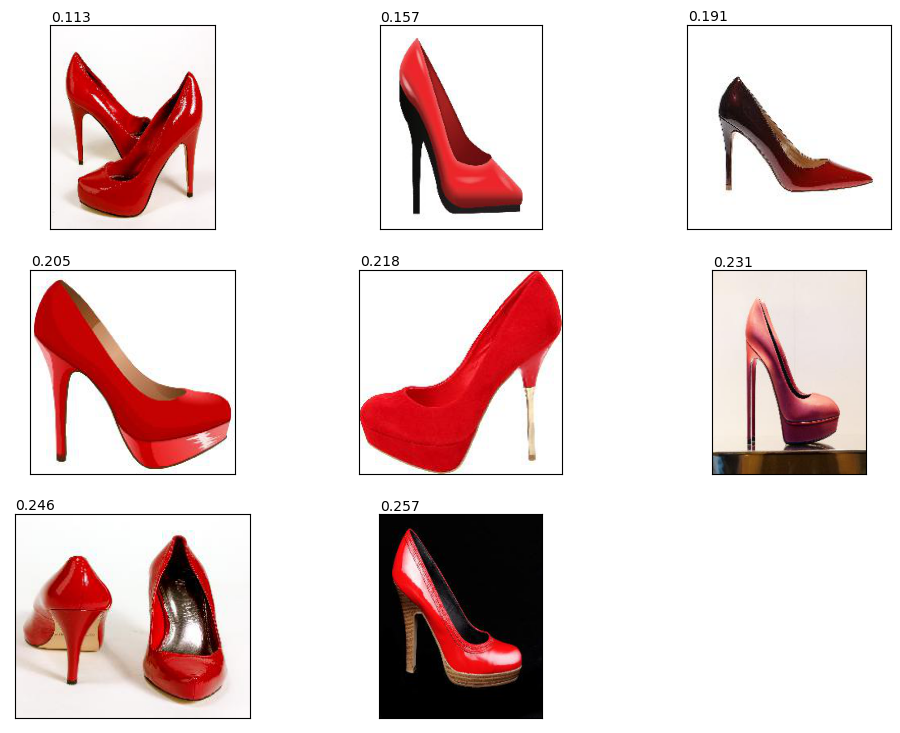

In [64]:
#plot results
plt.figure(figsize=(12,9))
for counter, result_file in enumerate(search_result_files):#iterate through files
    image = load_img(result_file)
    ax=plt.subplot(3,3, counter+1) #Plot on all same figure 3x3 grid, rows, columns, and index
    plt.imshow(image)
    plt.text(0,-5, round(image_distances[counter],3)) #Write cosine scores onto plot
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()